# Prediction of Car Prices Assignment (Geely Auto)
## Submitted by: Tanmaya Kharyal

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the data

In [242]:
# Reading the data
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [243]:
cars.shape

(205, 26)

In [244]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [245]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data Cleaning

In [246]:
# Splitting company name from car (car name column):

CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName) # inserting the column ComapnyName
cars.drop(['CarName'],axis=1,inplace=True) #Dropping the col. CarName since we only need company's name

In [247]:
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [248]:
cars.tail()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [249]:
# Checking the unique companies name: 

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### We can see certain names that are incorrectly spelled and certain with lower and upper case ambiguity. Correcting the same:

In [250]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_company(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_company('maxda','mazda')
replace_company('porcshce','porsche')
replace_company('toyouta','toyota')
replace_company('vokswagen','volkswagen')
replace_company('vw','volkswagen')


In [251]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [252]:
# Checking duplicates:

cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


#### No duplicate values exist. Hence, we are ready to go ahead !

##  Univariate Analysis

In [253]:
# Target Variable:Price
cars.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

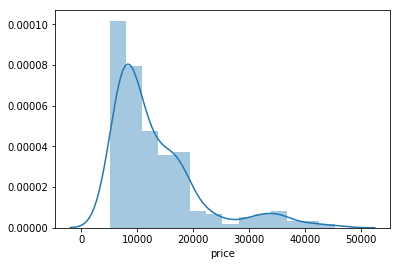

In [254]:
sns.distplot(cars.price)

#### Observations:
1. Mean and Median vary significantly !
2. Most cars are priced at the lower end of the price range.
3. Large standard deviation exists i.e. there is pretty significant variance in the prices. 

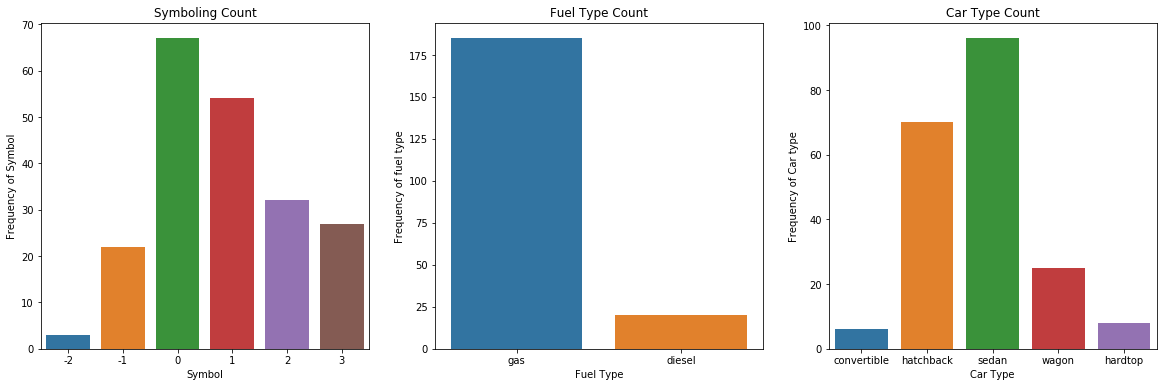

In [255]:
plt.figure(figsize=(20, 6))

#symboling
plt.subplot(1,3,1)
plt1 = sns.countplot(cars['symboling'])
plt.title('Symboling Count')
plt1.set(xlabel = 'Symbol', ylabel='Frequency of Symbol')

#fuel type
plt.subplot(1,3,2)
plt1 = sns.countplot(cars['fueltype'])
plt.title('Fuel Type Count')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

#car body
plt.subplot(1,3,3)
plt1 = sns.countplot(cars['carbody'])
plt.title('Car Type Count')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()


#### Observations:
1. Most cars lies in between w.r.t riskiness i.e neither too risky nor too safe. 
2. Gas cars are preferred over that of diesel. 
3. Sedan is the most favourable car type. 

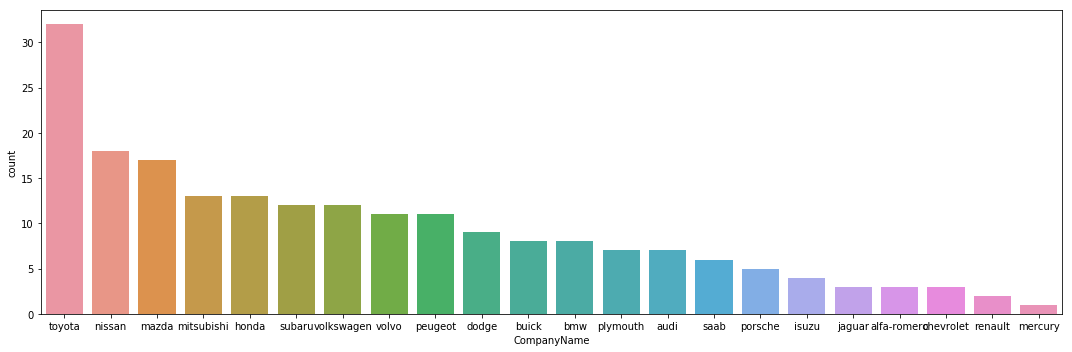

In [256]:
#Company
plt.figure(figsize = (15,5))
sns.countplot(cars['CompanyName'],order=pd.value_counts(cars['CompanyName']).index,)

plt.tight_layout()

#### Toyota is the most preferred car company followed by nissan and mazda

### Further evaluation w.r.t Average price

<Figure size 1080x864 with 0 Axes>

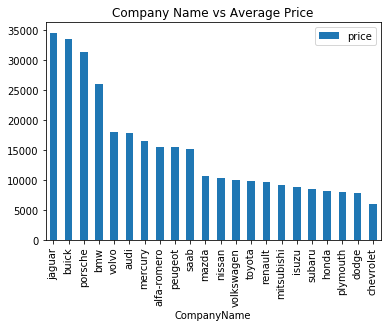

In [257]:
plt.figure(figsize=(15,12))
df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

#### Jaguar and Buick have the highest average price

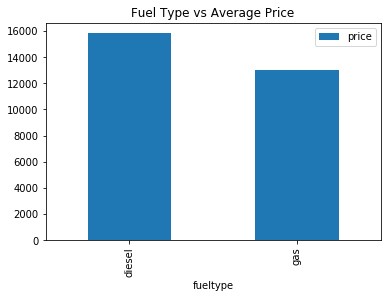

In [258]:
df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

#### Diesel cars have higher average price as compared to gas which somewhat justifies the gas preference over diesel as seen above in the count plot

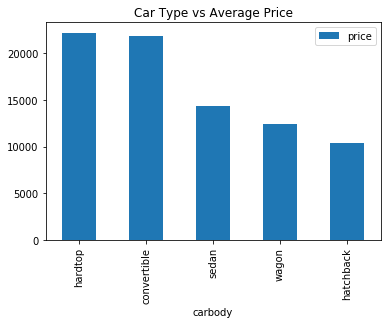

In [259]:
df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

#### Hardtop and Convertible car type have higher average prices. 

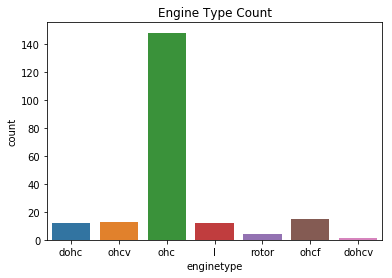

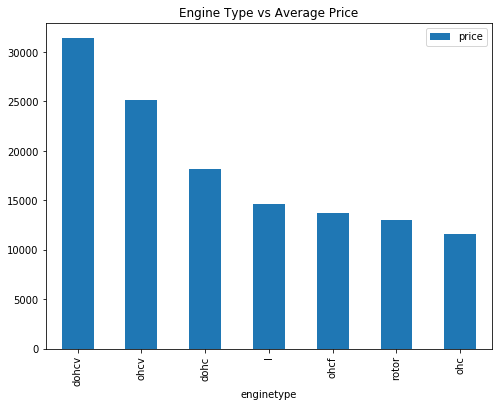

In [260]:
# engine type

plt.title('Engine Type Count')
sns.countplot(cars.enginetype)

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

#### Ohc is the most preferred engine. We can see its average price is the minimum where as dohcv has the highest price and is the least favoured. 


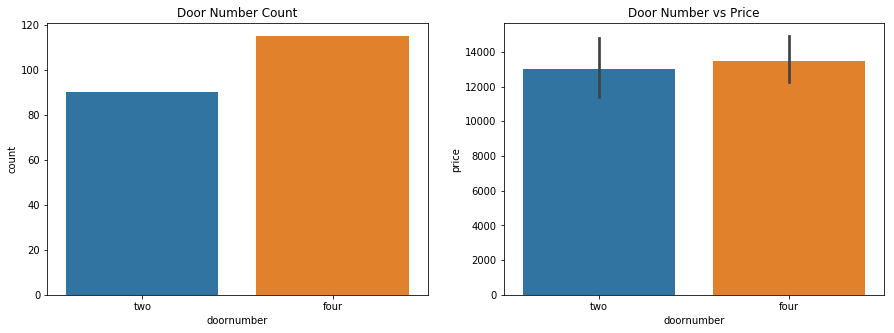

In [261]:
# Door Numbers:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(cars.doornumber)
plt.title('Door Number Count')


#df = pd.DataFrame(cars.groupby(['doornumber'])['price'].mean().sort_values(ascending = False))
plt.subplot(1,2,2)
#plt1=df.plot.bar(figsize=(8,6))
sns.barplot(x='doornumber',y='price',data=cars)
plt.title('Door Number vs Price')

plt.show()

#### Door Number doesn't seem to be that significant !

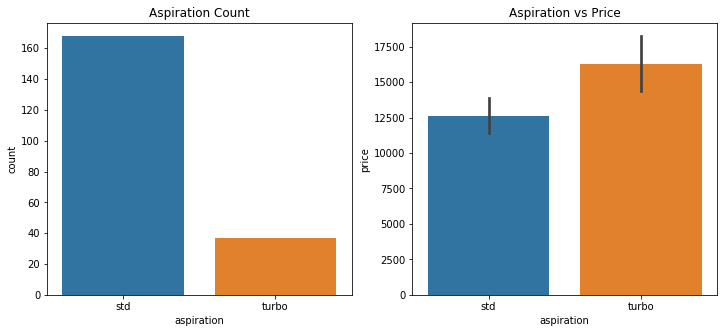

In [262]:
# Aspiration
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Aspiration Count')
sns.countplot(cars.aspiration)

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.barplot(x='aspiration',y='price',data=cars)

plt.show()

#### Cars with turbo aspiration engine are priced more than standard ones.

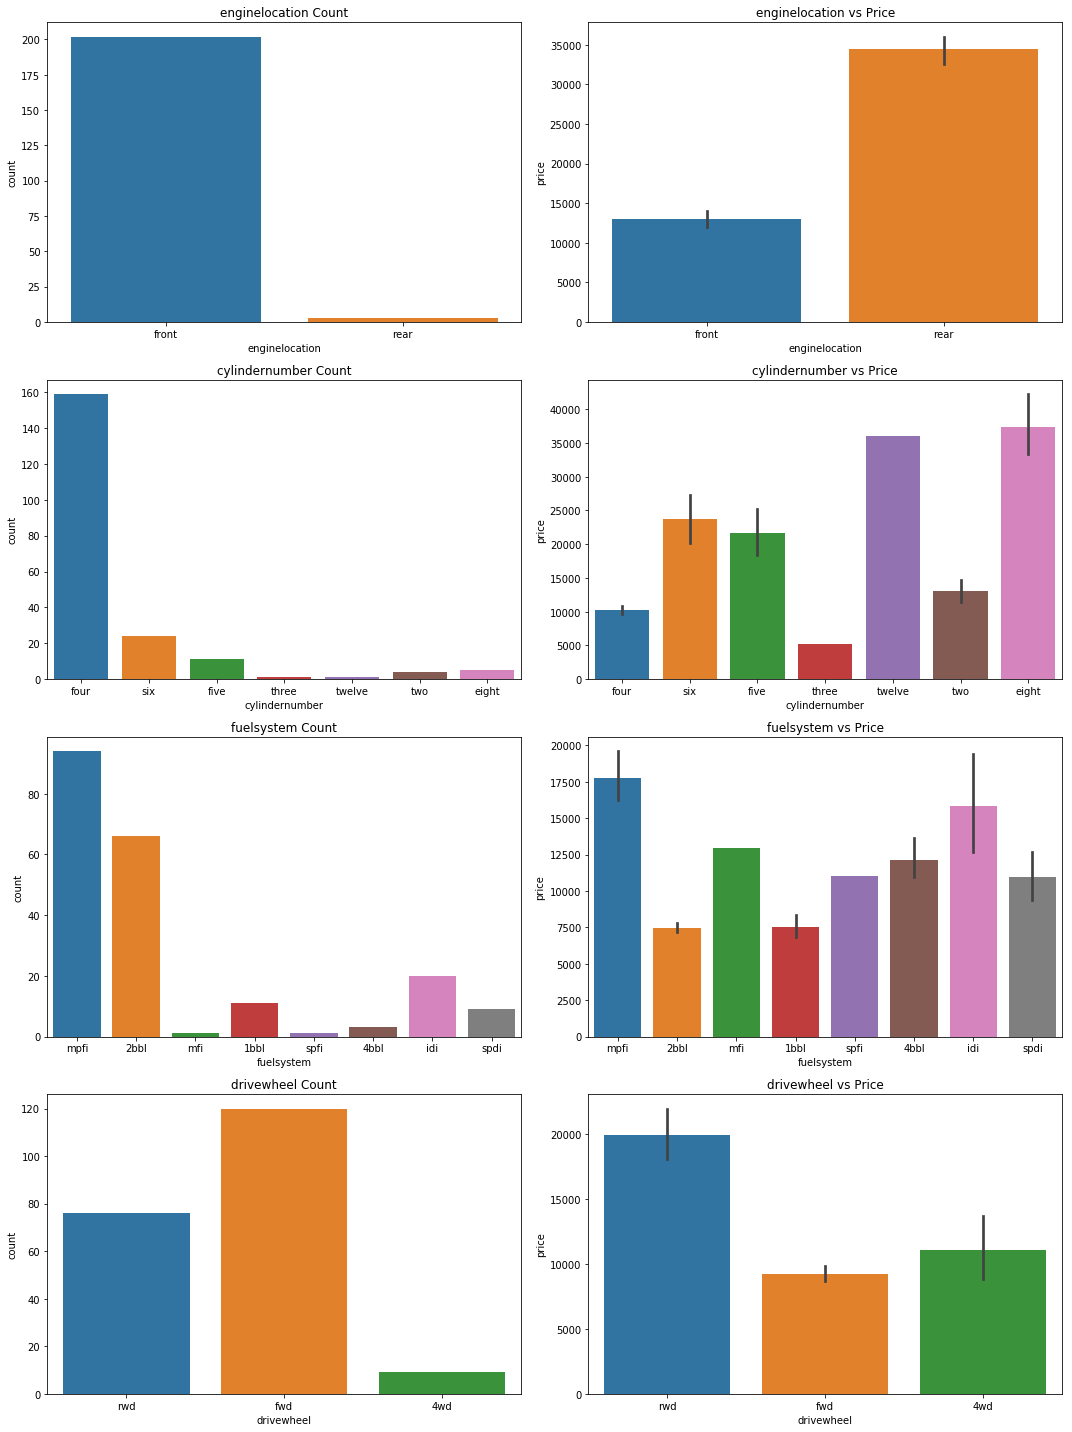

In [263]:
#Observing enginelocation, cylindernumber, fuelsystem and drivewheel
def plot_var(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Count')
    sns.countplot(cars[x])
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.barplot(x=cars[x], y=cars.price, data=cars)
    
plt.figure(figsize=(15,20))

plot_var('enginelocation', 1)
plot_var('cylindernumber', 3)
plot_var('fuelsystem', 5)
plot_var('drivewheel', 7)

plt.tight_layout()

#### Observations:
1. Rear engine location are highly priced and rare in preference. 
2. Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
3. mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range.
4. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

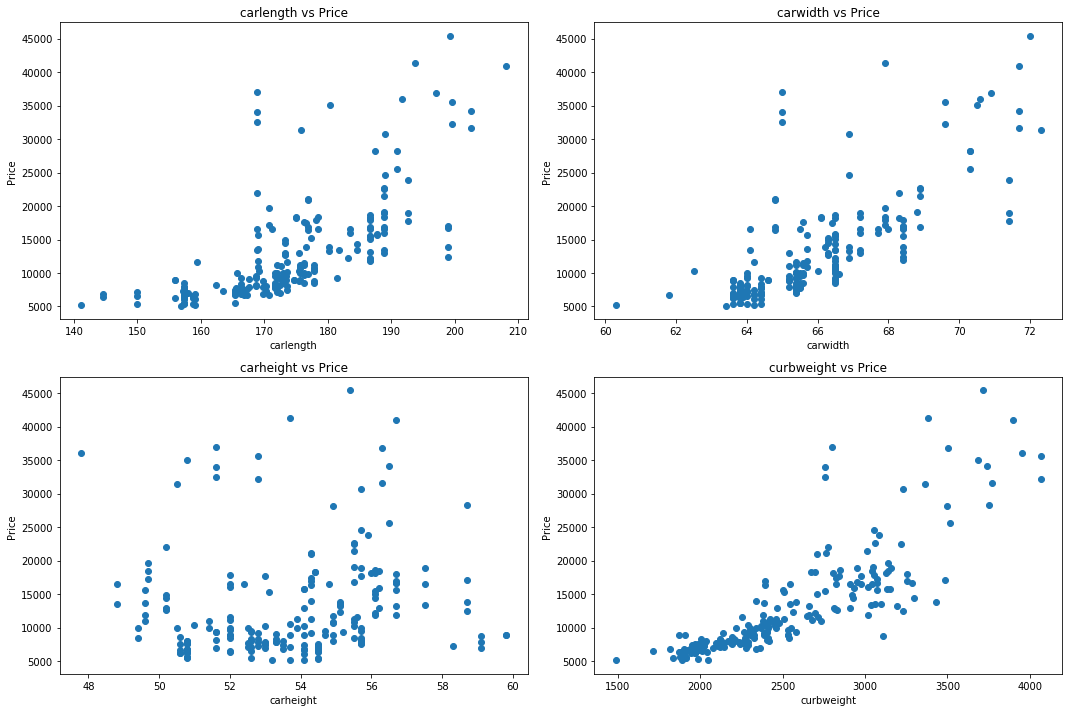

In [264]:
# Car Dimensions:

def car_dim(x,fig):
    plt.subplot(2,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(15,10))

car_dim('carlength', 1)
car_dim('carwidth', 2)
car_dim('carheight', 3)
car_dim('curbweight', 4)

plt.tight_layout()

#### 1. Length, width and weight of the car seem to be positively related with the price.
#### 2. There is not much of a relation with Height of the car with price.

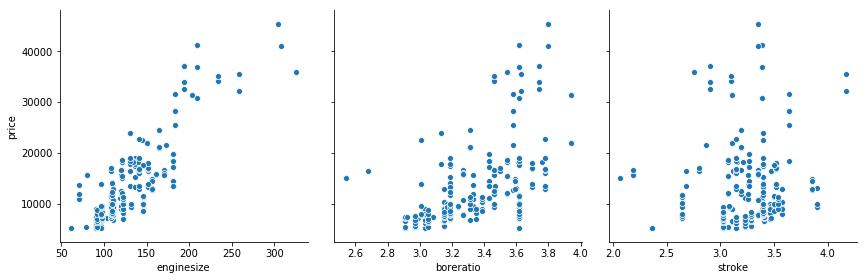

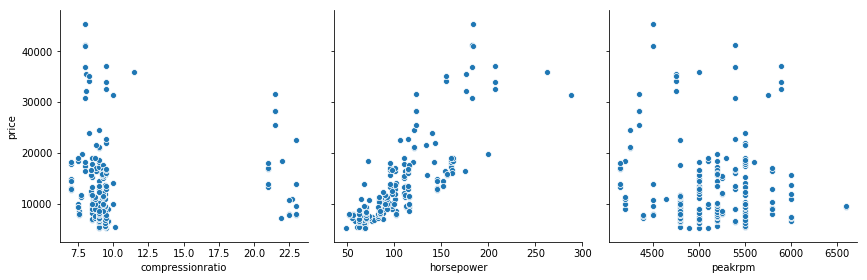

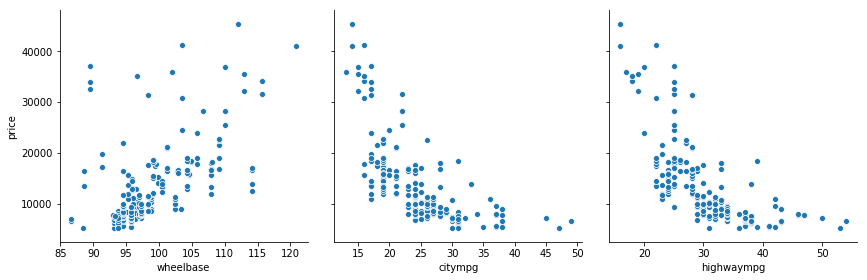

In [265]:
# pair plots for other numerical variables
def pp_var(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp_var('enginesize', 'boreratio', 'stroke')
pp_var('compressionratio', 'horsepower', 'peakrpm')
pp_var('wheelbase', 'citympg', 'highwaympg')

#### 1. enginesize, boreratio, horsepower, wheelbase seem to have a significant positive correlation with price.
#### 2. citympg, highwaympg seem to have a significant negative correlation with price.

In [266]:
# deriving mileage
cars['mileage'] = cars['citympg']*0.55 + cars['highwaympg']*0.45

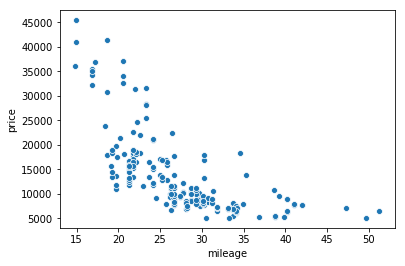

In [267]:
sns.scatterplot(x = 'mileage', y = 'price', data = cars)

#### Mileage has a negative correlation with price.

##  Bivariate Analysis

In [268]:
# dividing the cars into categories w.r.t average price
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


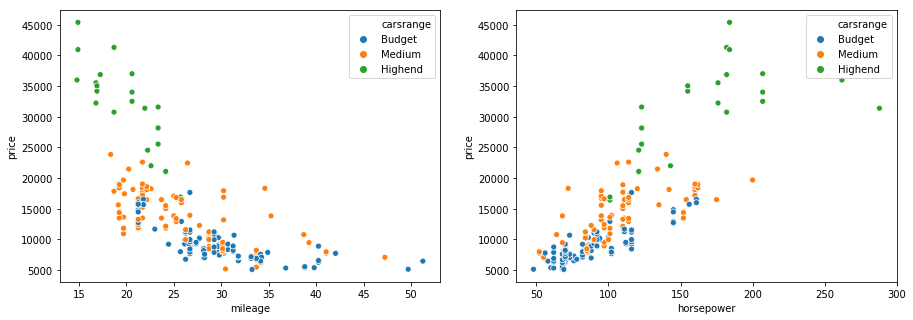

In [269]:
# observing mileage with price and horsepower with price, hue as carsrange
def bi_var(var,fig):
    plt.subplot(1,2,fig)
    sns.scatterplot(x = cars[var], y = 'price', hue = 'carsrange', data = cars)
    
plt.figure(figsize=(15,5))
bi_var('mileage',1) 
bi_var('horsepower',2)

    

#### Budget cars seem to have better mileage mostly where as horsepower that of highend cars is greater. 

<Figure size 1800x1440 with 0 Axes>

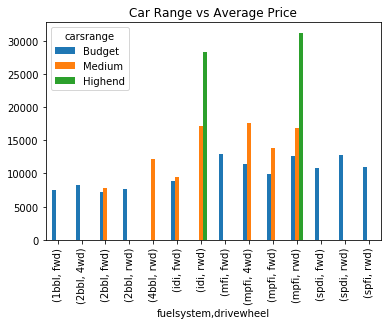

In [270]:
plt.figure(figsize=(25,20))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

#### Highend cars prefer rwd drivewheel with idi or mpfi fuelsystem.

## List of significant variables after the above univariate and bivariate analysis:

1. Car Range 
2. Engine Type 
3. Fuel type 
4. Car Body 
5. Aspiration 
6. Cylinder Number 
7. Drivewheel 
8. Curbweight 
9. Car Length
10. Car width
11. Engine Size 
12. Boreratio 
13. Horse Power 
14. Wheel base 
15. Mileage  

# Linear Regression

In [271]:
# shortlisting the data frame for linear regression for above variables. 

cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'mileage', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,mileage,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


## Visualising data

### Numeric data:

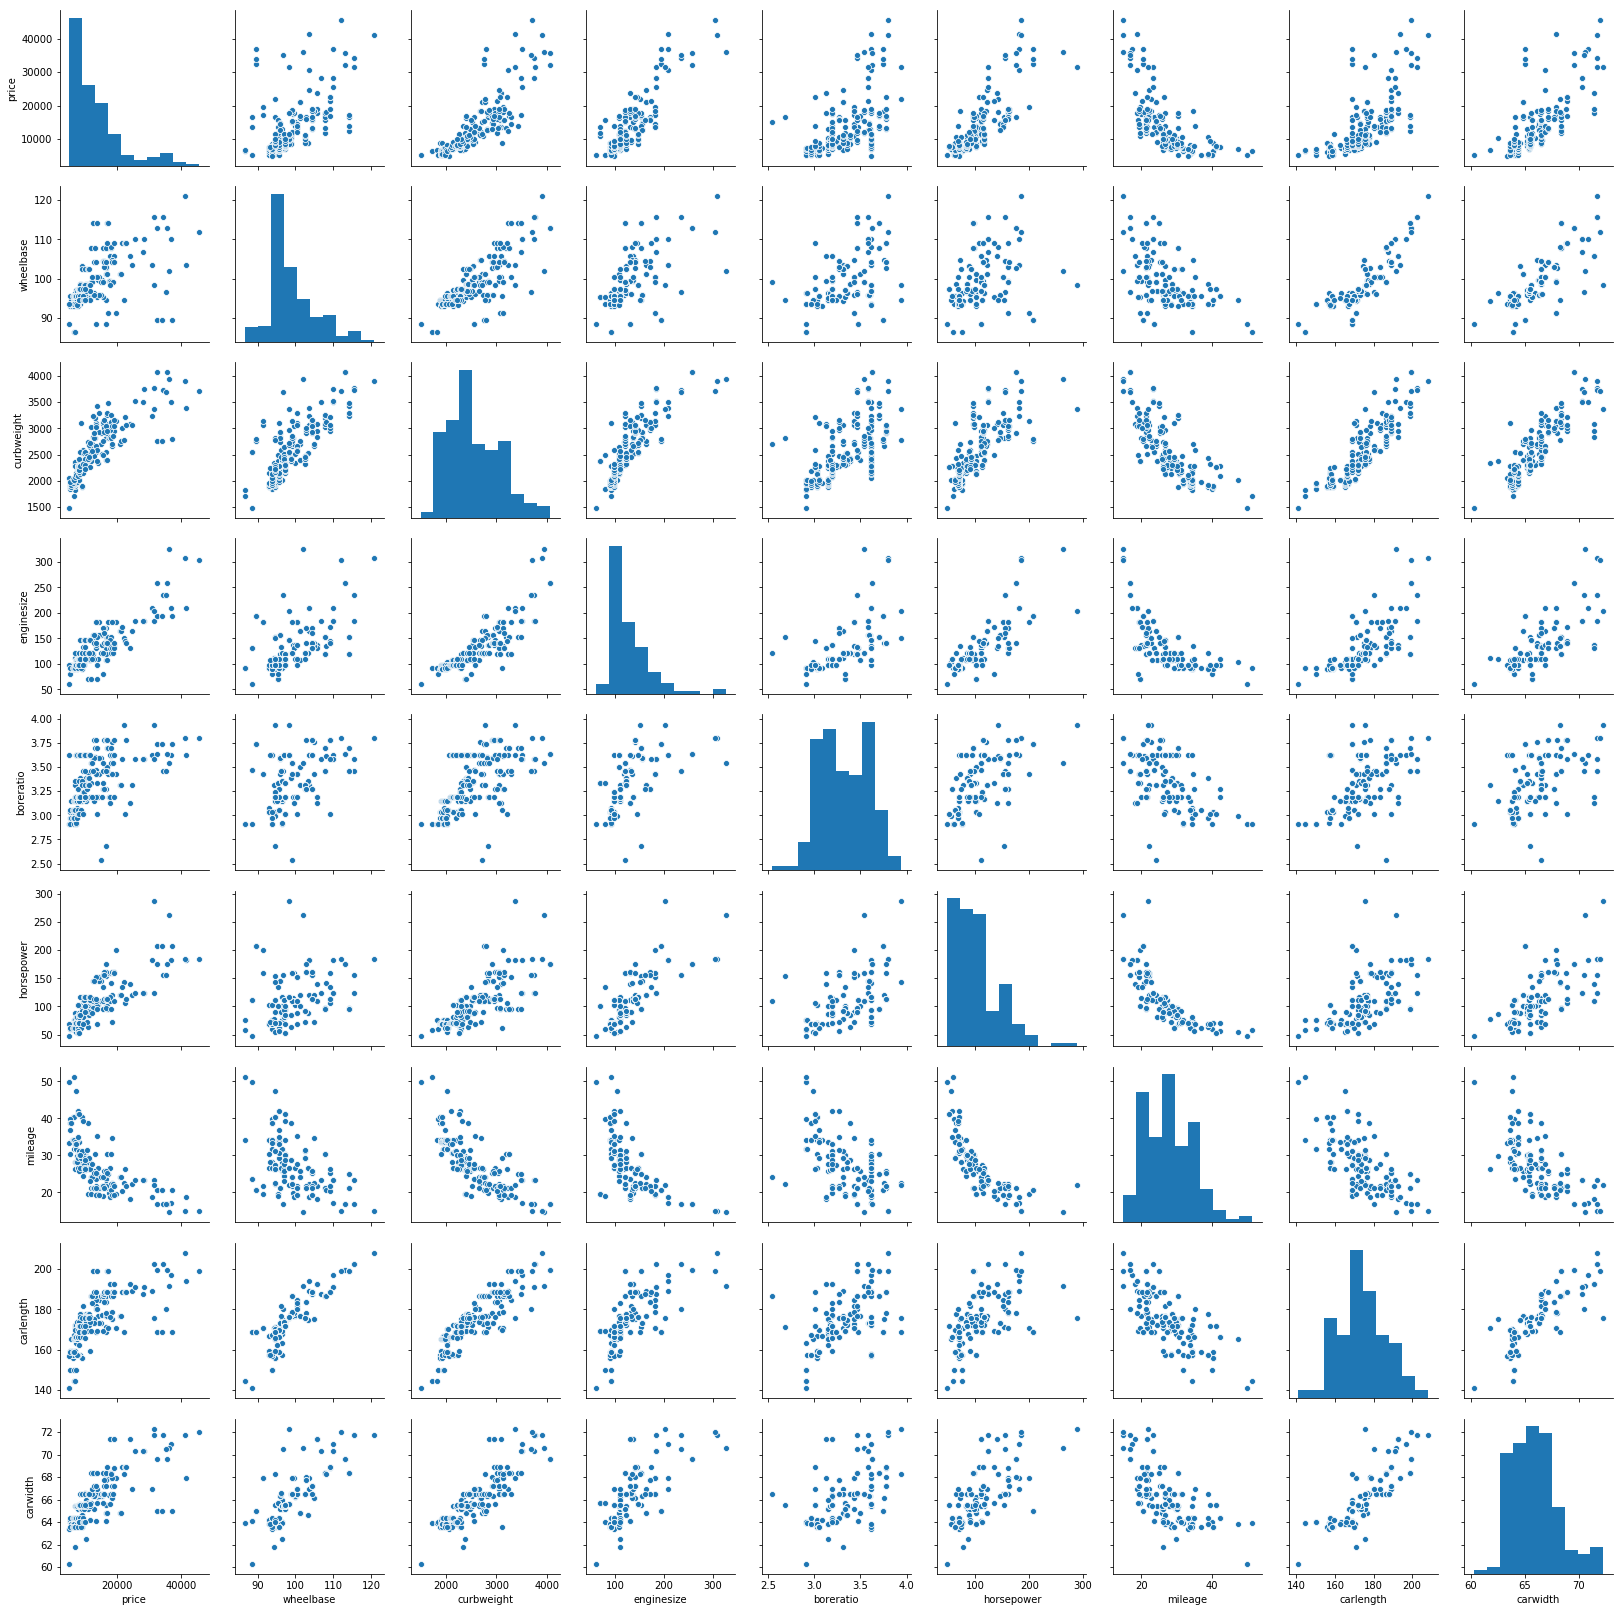

In [272]:
sns.pairplot(cars_lr)
plt.show()

### Categorical Data:

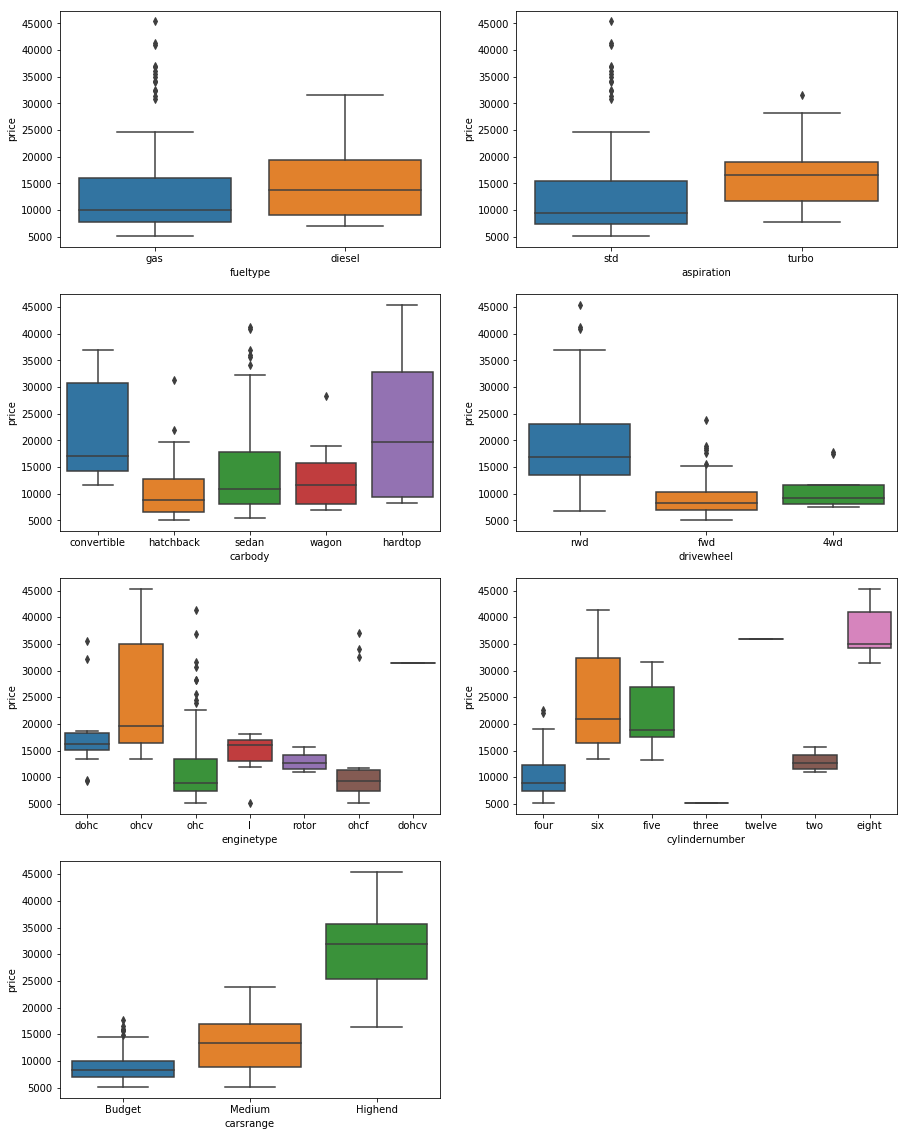

In [273]:
def cat_var(var,fig):
    plt.subplot(4,2,fig)
    sns.boxplot(x = cars[var], y = 'price', data = cars_lr)
    
    
plt.figure(figsize=(15,20))
cat_var('fueltype',1)
cat_var('aspiration',2)
cat_var('carbody',3)
cat_var('drivewheel',4)
cat_var('enginetype',5)
cat_var('cylindernumber',6)
cat_var('carsrange',7)

## Data Preparation:
### Dummy Variables:

In [274]:
cyl_no = pd.get_dummies(cars_lr['cylindernumber'], drop_first = True)
cars_lr = pd.concat([cars_lr, cyl_no], axis = 1)

In [275]:
c_range = pd.get_dummies(cars_lr['carsrange'], drop_first = True)
cars_lr = pd.concat([cars_lr, c_range], axis = 1)

In [276]:
eng_typ = pd.get_dummies(cars_lr['enginetype'], drop_first = True)
cars_lr = pd.concat([cars_lr, eng_typ], axis = 1)

In [277]:
drwh = pd.get_dummies(cars_lr['drivewheel'], drop_first = True)
cars_lr = pd.concat([cars_lr, drwh], axis = 1)

In [278]:
carb = pd.get_dummies(cars_lr['carbody'], drop_first = True)
cars_lr = pd.concat([cars_lr, carb], axis = 1)

In [279]:
asp = pd.get_dummies(cars_lr['aspiration'], drop_first = True)
cars_lr = pd.concat([cars_lr, asp], axis = 1)

In [280]:
fuelt = pd.get_dummies(cars_lr['fueltype'], drop_first = True)
cars_lr = pd.concat([cars_lr, fuelt], axis = 1)

In [281]:
cars_lr.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber','carsrange'], axis = 1, inplace = True)

In [282]:
cars_lr.shape

(205, 31)

### Train Test Split :

In [283]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

### Feature Scaling:

In [284]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','mileage','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [285]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,mileage,carlength,carwidth,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,0,...,0,0,1,0,0,0,1,0,0,1
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,0,...,0,0,0,1,0,1,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,0,...,0,0,0,1,0,1,0,0,0,1
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,0,...,0,0,0,1,0,0,0,0,0,1
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,0,...,0,0,0,1,0,0,0,1,1,1


In [286]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,mileage,carlength,carwidth,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.062937,...,0.062937,0.027972,0.594406,0.349650,0.020979,0.342657,0.475524,0.132867,0.181818,0.909091
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.243703,...,0.243703,0.165472,0.492733,0.478536,0.143818,0.476266,0.501156,0.340624,0.387050,0.288490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


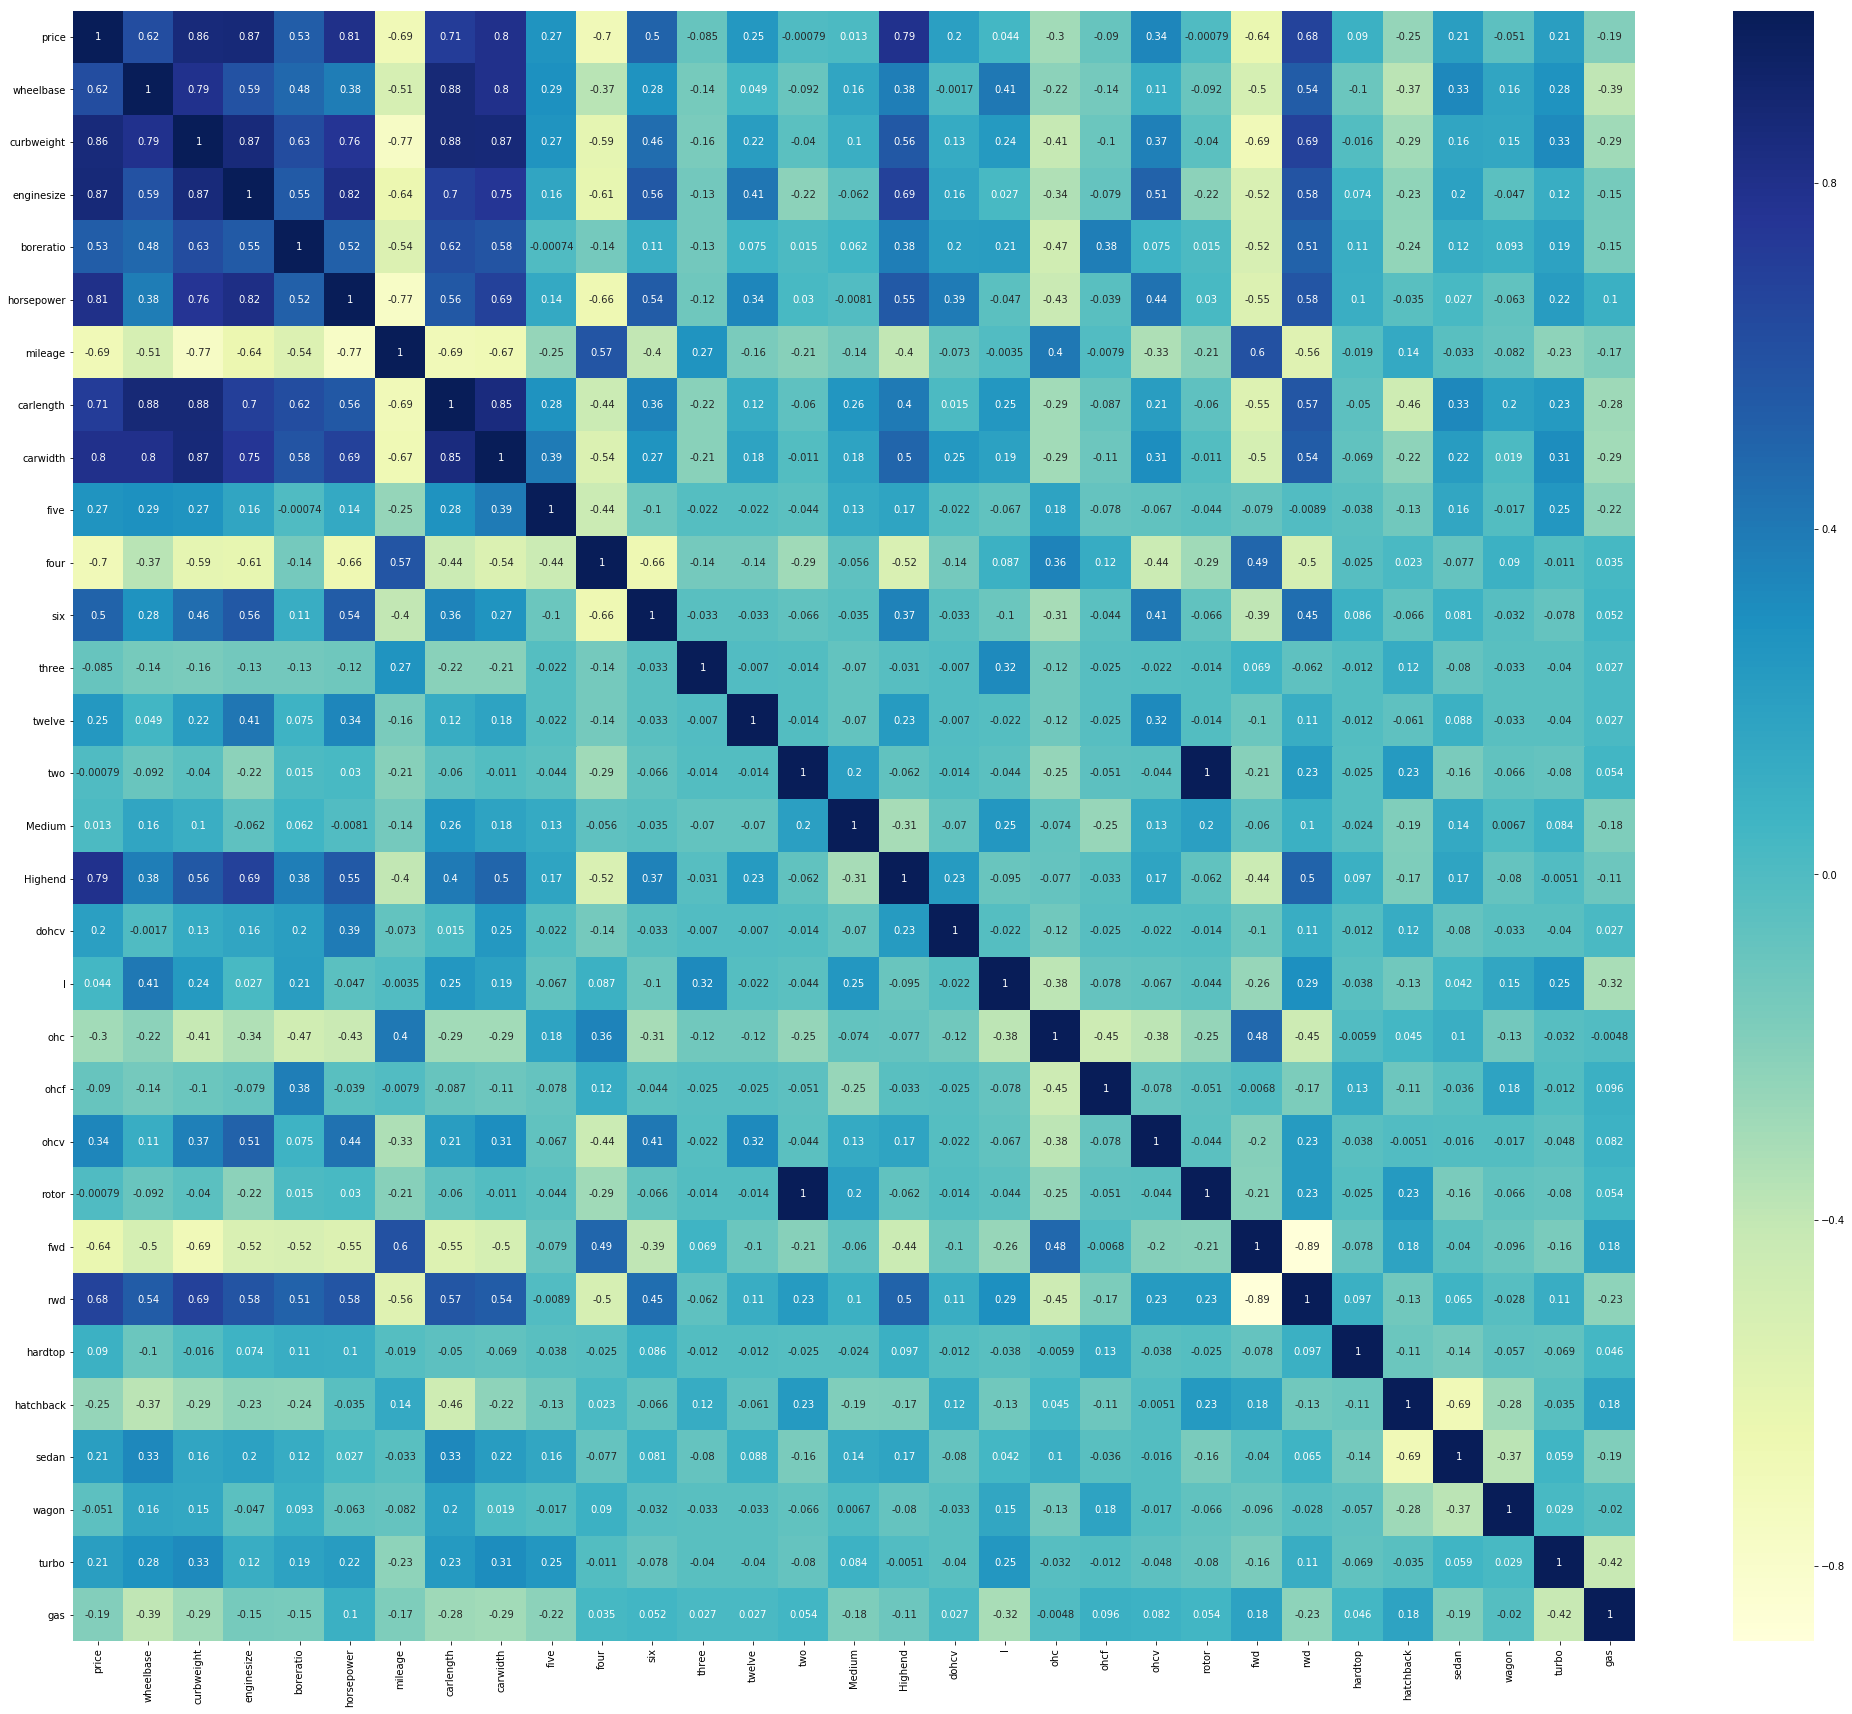

In [287]:
#Correlation using heatmap
plt.figure(figsize = (35, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building:

In [288]:
y_train = df_train.pop('price')
X_train = df_train

## Model Building

In [289]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [290]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [291]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 21),
 ('Medium', False, 12),
 ('Highend', True, 1),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 20),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('turbo', False, 18),
 ('gas', False, 17)]

In [292]:
col=X_train.columns[rfe.support_]
col

Index(['curbweight', 'horsepower', 'mileage', 'carwidth', 'twelve', 'Highend',
       'dohcv', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

In [293]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'enginesize', 'boreratio', 'carlength', 'five', 'four',
       'six', 'three', 'two', 'Medium', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'fwd', 'rwd', 'hardtop', 'turbo', 'gas'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [294]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [295]:
# creating a function for model building, since we'll require it time and again
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    

In [296]:
# creating function for VIF
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [297]:
# model 1
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.29e-70
Time:                        13:18:57   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0947      0.042     -2.243      0.0

In [298]:
checkVIF(X_train_new)

,Features,VIF
0,const,71.51
1,curbweight,8.38
9,sedan,6.18
2,horsepower,5.94
8,hatchback,5.68
4,carwidth,5.19
3,mileage,3.74
10,wagon,3.62
7,dohcv,1.73
6,Highend,1.68


In [299]:
# dropping twelve as p value is high
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

In [300]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           4.25e-71
Time:                        13:18:57   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0764      0.041     -1.851      0.0

In [301]:
# dropping mileage since it is pretty insignificant

X_train_new = X_train_new.drop(["mileage"], axis = 1)

In [302]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           7.85e-72
Time:                        13:18:57   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [303]:
checkVIF(X_train_new)

,Features,VIF
0,const,26.90
1,curbweight,8.10
7,sedan,6.07
6,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
8,wagon,3.58
4,Highend,1.63
5,dohcv,1.46


In [304]:
# dropping curbweight as it has high VIF
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [305]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           4.70e-70
Time:                        13:18:58   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [306]:
checkVIF(X_train_new)

,Features,VIF
0,const,26.89
6,sedan,6.06
5,hatchback,5.54
7,wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
3,Highend,1.56
4,dohcv,1.21


In [307]:
#  dropping sedan since it has high VIF:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

In [308]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.68e-69
Time:                        13:18:58   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [309]:
#dropping wagon-high p value

X_train_new = X_train_new.drop(["wagon"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.57e-70
Time:                        13:18:59   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [310]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
3,Highend,1.53
4,dohcv,1.21
5,hatchback,1.13


In [311]:
# Dropping dohcv to see if any change in model.
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.04e-67
Time:                        13:18:59   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

In [312]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
3,Highend,1.53
4,hatchback,1.10


## Residual Analysis

In [313]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5,0,'Errors')

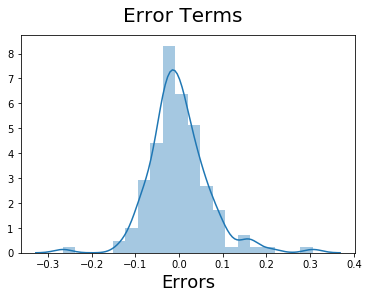

In [314]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

#### Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

## Making Predictions

In [315]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','mileage','carlength','carwidth','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [316]:
y_test = df_test.pop('price')
X_test = df_test

In [317]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [318]:
y_pred = lm.predict(X_test_new)

## Model Evaluation

In [319]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.898667338035183

Text(0,0.5,'y_pred')

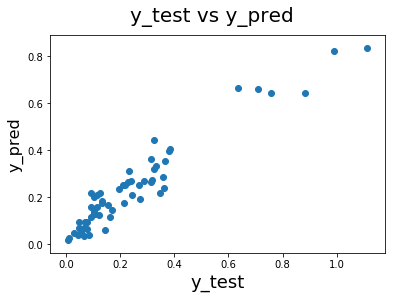

In [320]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

## Conclusions:
#### 1. Equation of best fitted line is :
#### price= 0.4402 horsepower + 0.3957 carwidth + 0.2974 Highend - 0.0414 hatchback - 0.0824

#### 2. p-values for all the coefficients seem to be less than the significance level of 0.05, meaning that all the predictors are statistically significant.
#### 3. R-sqaured and Adjusted R-squared  - 0.899 and 0.896 - approx 90% variance explained.
#### 4. F-stats and Prob(F-stats) (overall model fit) - 308.0 and 1.04e-67(approx. 0.0) - Model fit is significant and explains 90% variance is just not by chance.